In [552]:
import pandas as pd
import numpy as np

from subprocess import check_output
print(check_output(["ls", "./hw1-data"]).decode("utf8"))

X_test.csv
X_train.csv
y_test.csv
y_train.csv



In [553]:
X_train_full = pd.read_csv("./hw1-data/X_train.csv", header=None)
X_train = X_train_full.drop([6], axis=1)
print(X_train.shape)
X_train.head()


(350, 6)


,0,1,2,3,4,5
0,0.30957,-0.36707,0.45545,-0.200830,-0.73992,-0.80885
1,0.30957,0.35920,-0.11611,-0.038361,0.16625,-0.80885
2,-0.86291,-0.99778,-0.89551,-1.225100,-0.55868,-0.26592
3,-0.86291,-0.69198,-0.42787,-0.562260,-0.15997,1.09140
4,-0.86291,-0.92133,-0.63571,-1.251000,-0.41369,0.81993


In [554]:
y_train = pd.read_csv("./hw1-data/y_train.csv", header=None)
y_train.head()

,0
0,-3.4459
1,-5.4459
2,5.5541
3,11.5540
4,12.2540


In [555]:
u, s, vh = np.linalg.svd(X_train, full_matrices=False)
u.shape, s.shape, vh.shape

((350, 6), (6,), (6, 6))

In [556]:
np.allclose(X_train, np.dot(u * s, vh))

True

In [557]:
s_mat = np.diag(s)

In [558]:
WRR = []

w_ls = np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), np.dot(np.transpose(X_train), y_train))
v = vh.T
for lmda in range(5001):    
    w_rr = np.append(np.dot(np.linalg.inv(np.dot(X_train.T,X_train) + lmda * np.identity(np.shape(np.dot(X_train.T, y_train))[0])), np.dot(X_train.T, y_train)), np.mean(y_train))
    WRR.append(w_rr)

WRR = np.array(WRR)
WRR.shape

(5001, 7)

In [559]:
# df lambda
df_l = []

for i in range(5001):
    df_l.append(np.sum(s**2/(i + s**2)))

s

array([ 37.96221572,  16.91947966,  15.42100981,   6.70644826,
         4.68955116,   3.56635938])

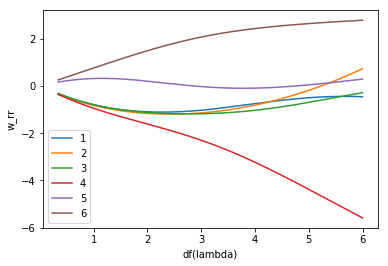

In [560]:
import matplotlib.pyplot as plt


plt.figure()
for i in range(6):
    pp, = plt.plot(df_l, WRR[:, i])
    pp.set_label(str(i+1))
plt.legend()
plt.xlabel('df(lambda)')
plt.ylabel('w_rr')
plt.show()

### (b) The 4th dimension (car weight) and 6th dimension (car year) clearly stand out over the other dimensions. What information can we get from this?

All the other dimensions did not change very much as lambda approached 5000 except the 4th and 6th dimensions. They had considerably higher magnitudes when lambda was close to 0 (maximum likelihood) and decreased the more we penalized them for their magnitudes. 

This tells us that without any bias and depending strictly on the model's maximum likelihood, those two dimensions are seen as very influencial. I.E. the bigger the car weight and/or the smaller the car year, the lower the miles per gallon of the car. Obviously our RR assumption (prior) is that no single feature should have so much influence therefore lambda's increase brings those features' magnitudes down.

In [561]:
X_test = pd.read_csv("./hw1-data/X_test.csv", header=None)
print(X_test.shape)
X_test.head()

(42, 7)


,0,1,2,3,4,5,6
0,0.30957,0.34964,0.013785,0.52674,0.49248,0.27700,1
1,1.48210,1.48680,1.572600,0.84226,-1.46490,-1.62320,1
2,-0.86291,-0.71110,-0.661690,-0.41510,1.10870,1.63430,1
3,0.30957,0.53121,-0.116110,0.94586,0.52872,-0.53739,1
4,1.48210,1.02810,0.897110,0.26774,-1.57360,0.54847,1


In [562]:
y_test = pd.read_csv("./hw1-data/y_test.csv", header=None)
y_test.head()



,0
0,-2.9459
1,-8.4459
2,4.5541
3,-7.4459
4,-5.3459


In [563]:
def RMSE(y_test, y_pred):
    np.sqrt(np.sum((y_test-y_pred)**2)/42)

y_pred = []
for i in range(51):
    w_rr_i = WRR[i]
    y_pred.append(np.dot(X_test , w_rr_i))
    
y_pred = np.array(y_pred)
y_pred.shape

RMSE_ar = []

for i in range(51):
    RMSE_ar.append(np.sqrt(np.sum((np.squeeze(y_test) - y_pred[i])**2)/42))


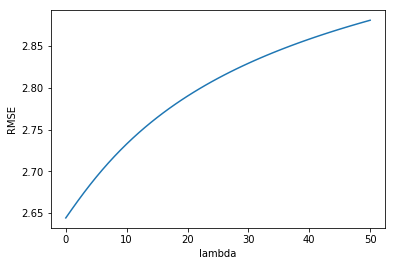

In [564]:
plt.figure()

pp, = plt.plot(range(51), RMSE_ar )
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.show()

### (c)
The increase of lambda is only increasing the error so using ridge regression in this example is not helping generalize our model on the test data. We are better off using least square (lambda = 0).

In [565]:
X_train_2 = np.concatenate((np.array(X_train), np.array(X_train)**2), axis =1)
X_train_2_norm = X_train_2 - X_train_2.mean(0)
# X_train_2_norm = np.append(X_train_2_norm, np.array([1 for i in range(350)]).reshape(350, 1), axis=1)

X_test_2 = np.concatenate((np.array(X_test.drop(6, axis=1)), np.array(X_test.drop(6, axis=1))**2), axis =1)
X_test_2_norm = np.concatenate((np.array(X_test.drop(6, axis=1)), np.array(X_test.drop(6, axis=1))**2), axis =1) - X_train_2.mean(0) 

X_train_3 = np.concatenate((X_train_2, np.array(X_train)**3), axis =1)
X_train_3_norm = X_train_3 - X_train_3.mean(0)

X_test_3_norm = np.concatenate((np.array(X_test_2), np.array(X_test.drop(6, axis=1))**3), axis =1) - X_train_3.mean(0)


In [566]:
WRR_2 = []
for lmda in range(501):    
    w_rr = np.dot(np.linalg.inv(np.dot(X_train_2_norm.T,X_train_2_norm) + lmda * np.identity(np.shape(np.dot(X_train_2_norm.T, y_train))[0])), np.dot(X_train_2.T, y_train))
    WRR_2.append(w_rr)

WRR_2 = np.array(WRR_2)
WRR_2.shape





(501, 12, 1)

In [567]:
WRR_3 = []
for lmda in range(501):    
    w_rr = np.dot(np.linalg.inv(np.dot(X_train_3_norm.T,X_train_3_norm) + lmda * np.identity(np.shape(np.dot(X_train_3_norm.T, y_train))[0])), np.dot(X_train_3.T, y_train))
    WRR_3.append(w_rr)

WRR_3 = np.array(WRR_3)
WRR_3.shape


(501, 18, 1)

In [568]:
y_pred_1 = []
for i in range(501):
    w_rr_i = WRR[i]
    y_pred_1.append(np.dot(X_test , w_rr_i))
    
y_pred_1 = np.array(y_pred_1)
y_pred.shape

RMSE_ar_1 = []

for i in range(501):
    RMSE_ar_1.append(np.sqrt(np.sum((np.squeeze(y_test) - y_pred_1[i])**2)/42))
    
len(RMSE_ar_1)

501

In [569]:
y_pred_2 = []
for i in range(501):
    w_rr_i_2 = WRR_2[i]
    y_pred_2.append(np.dot(X_test_2_norm , w_rr_i_2))
    
y_pred_2 = np.array(y_pred_2).reshape(501, 42)

RMSE_ar_2 = []

for i in range(501):
    RMSE_ar_2.append(np.sqrt(np.sum((np.squeeze(y_test) - y_pred_2[i])**2)/42))
    
len(RMSE_ar_2)

501

In [570]:
y_pred_3 = []
for i in range(501):
    w_rr_i_3 = WRR_3[i]
    y_pred_3.append(np.dot(X_test_3_norm , w_rr_i_3))


y_pred_3 = np.array(y_pred_3).reshape(501, 42)

RMSE_ar_3 = []

for i in range(501):
    RMSE_ar_3.append(np.sqrt(np.sum((np.squeeze(y_test) - y_pred_3[i])**2)/42))
    
len(RMSE_ar_3)

501

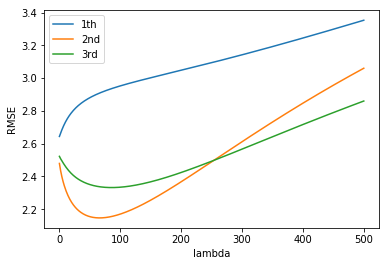

In [571]:
plt.figure()
pp, = plt.plot(range(501), RMSE_ar_1 )
pp.set_label("1th")
pp, = plt.plot(range(501), RMSE_ar_2 )
pp.set_label("2nd")
pp, = plt.plot(range(501), RMSE_ar_3 )
pp.set_label("3rd")
plt.legend()
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.show()

### Part 2 (d)
p = 2 is clearly better than the others. Compared to p=1, here ridge regression does make sense as there is an optimal lambda in which the RMSE is at its lowest. 